The Fractional Friedmann Equation:
 
$$ {}^{C}D^{\alpha}_{t}a(t) = \tau_{0}^{\alpha-1} H_{0} \left[\sum_{i}\Omega_{i}\left(\frac{a_{0}}{a(t)}\right)^{3(1+w_{i})}\right]^{1/2} a(t) $$
 
where:
- $0 < \alpha \leq 1$ is the fractional order
- $\tau_0$ is a characteristic time scale (typically $1/H_0$)
- $\Omega_i$ are density parameters for different components (matter, dark energy, radiation)
- $w_i$ are equation of state parameters
Gaussian Initial Conditions
$$ a(t) = a_0 \exp\left(-\frac{(t-t_0)^2}{2\sigma^2}\right) $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import warnings
warnings.filterwarnings('ignore')

# For interactive plots in Jupyter
%matplotlib inline

# Set style for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

In [3]:
def solve_fractional_adaptive(alpha=1, H0=1.0, Omega_m=0.315, Omega_r=9.2e-5,
                             a_start=1e-6, a_end=1.0,
                             min_dt=1e-12, max_dt=1e-7, safety=0.1):

    # Initialize lists
    t_list = [0.0]
    a_list = [a_start]
    
    t = 0.0
    a = a_start
    Omega_de = 1.0 - Omega_m - Omega_r
    
    iteration = 0
    max_iterations = 1000000
    
    while a < a_end and iteration < max_iterations:
        if a < 1e-4:
            dt_stability = safety * a**2 / (H0 * np.sqrt(Omega_r))
        else:
            dt_stability = safety * a**(1.5) / (H0 * np.sqrt(Omega_m))
        
        dt = max(min_dt, min(max_dt, dt_stability))
                
        n = len(t_list) - 1  # Current index (0-based)
        
        # Precompute gamma factor
        gamma_factor = 1.0 / gamma(alpha + 1)
        
        # Compute sum: Σ_{j=0}^n b_{j,n+1} f(a_j)
        sum_term = 0.0
        for j in range(n + 1):
            # Weight: b_{j,n+1} = 1/Γ(α+1) * [(n+1-j)^α - (n-j)^α]
            weight = gamma_factor * ((n + 1 - j)**alpha - (n - j)**alpha)
            
            # f(a_j) = H0 * a_j * sqrt(...)
            a_j = a_list[j]
            f_aj = H0 * a_j * np.sqrt(Omega_m * a_j**(-3) + Omega_r * a_j**(-4) + Omega_de)
            
            sum_term += weight * f_aj
        
        # Update: a_{n+1} = a_0 + Δt^α * sum_term
        a_new = a_start + (dt**alpha) * sum_term
        
        # Ensure positivity
        a_new = max(a_new, 1e-20)
        
        # Update
        t += dt
        a = a_new
        
        t_list.append(t)
        a_list.append(a)
        
        iteration += 1
        
    
    # Convert to arrays
    t_array = np.array(t_list)
    a_array = np.array(a_list)
    
    # Find present epoch
    if np.any(a_array >= 1.0):
        idx_present = np.argmax(a_array >= 1.0)
        t_present = t_array[idx_present]
    else:
        idx = np.argmin(np.abs(a_array - 1.0))
        t_present = t_array[idx]
    
    return t_array, a_array, t_present


In [4]:
t_frac, a_frac, t_present_frac = solve_fractional_adaptive(alpha=1.0,H0=1.0,Omega_m=0.315,Omega_r=9.2e-5,
    a_start=1e-6,a_end=1.0,min_dt=1e-12,max_dt=1e-7,safety=0.1)

KeyboardInterrupt: 

In [23]:
# Convert to physical time (s)
H0_physical = 2.19e-18  # s⁻¹
seconds_per_year = 365.25 * 24 * 3600
seconds_per_Gyr = seconds_per_year * 1e9

# Time from Big Bang in s
t_s = t_frac / H0_physical

In [24]:
y_ticks = [1e1,1e3,1e5,1e7,1e9,1e11,1e13,1e15,1e17]

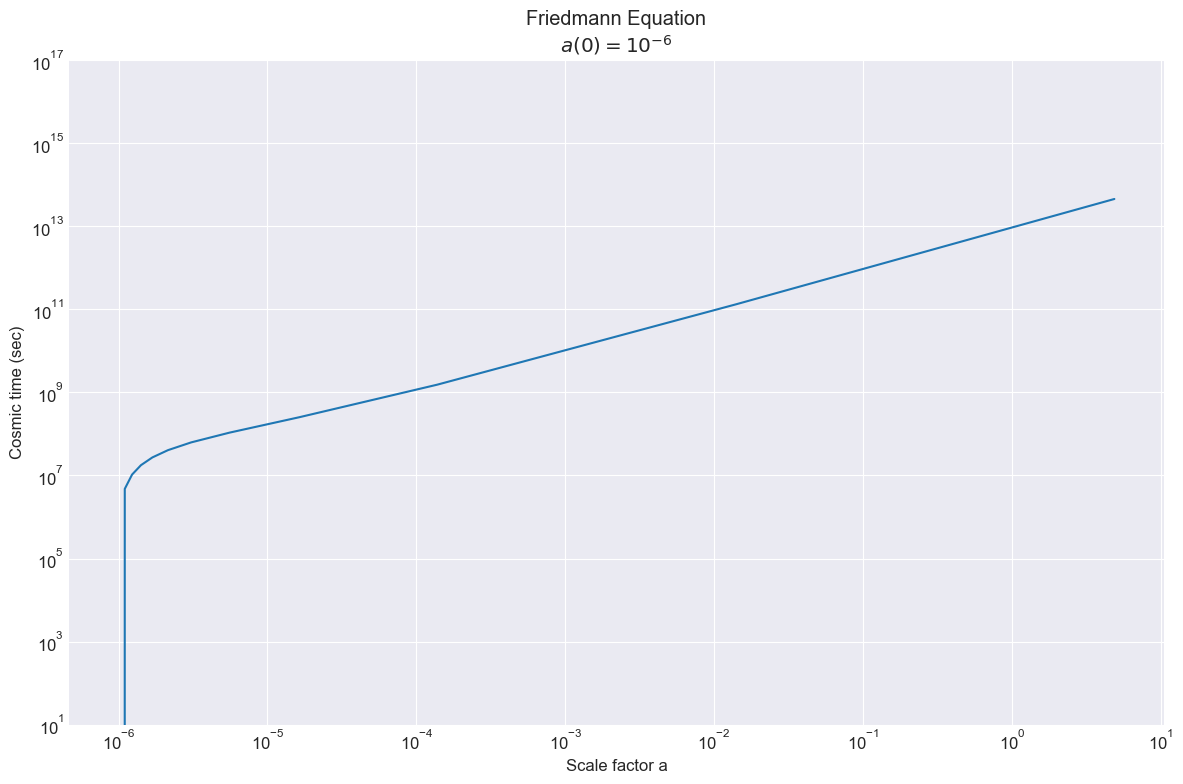

In [25]:
plt.loglog(a_frac,t_s)
plt.xlabel(r"Scale factor a")
plt.ylabel(r"Cosmic time (sec)")
plt.yticks(y_ticks)
plt.title("Friedmann Equation\n$ a(0)=10^{-6}$")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
t_s[-1]

45795331886143.625

In [31]:
t_s[-1]

45795331886143.625

In [27]:
a_frac[0]

1e-06

In [28]:
a_frac[-1]

4.871354961640304

In [29]:
a_frac[-2]

0.014048857667376716